In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

In [29]:
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "JeOpBYvN38K6jwVKoQTuKhofj"
consumer_secret = "qNKYIpKRxVR95w3BzfD9CITJ2xhq7MM3I36yEqh2U6WsJAfB9q"
access_token = "975022209948413954-FxRMca7HQaLq01HP9YoXj3tk6HrHx2w"
access_token_secret = "gt4ZvTpOfSb69flVrWfLcEtpVmZCxhL0ly4BUq8n8GfUf"


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [30]:

# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# Array to hold sentiment
sentiment_array = []

# Counter
counter = 1

# Variables for holding sentiments
date_list= []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweetago_list = []
target_list = []

for target in target_terms:

# Loop through 5 pages of tweets (total 100 tweets)
    counter=0
  #  for x in range(5):
    for x in range(5):
    # Get all tweets from home feed
        public_tweets = api.user_timeline(target,count=20, result_type="recent")

    # Loop through all tweets 
        for tweet in public_tweets:
       
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
        
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            date_list.append(tweet["created_at"])
            tweetago_list.append(tweets_ago)
            target_list.append(target)
            # Add to counter 
            counter = counter+1

In [31]:
sentiment_dict = {"Target": target_list,
                 "Date": date_list,
                 "Compound":compound_list,
                 "Postitive":positive_list,
                 "Negative":negative_list,
                  "Nuetral":neutral_list,
                 "Tweet Ago":tweetago_list}

sentiment_df = pd.DataFrame(sentiment_dict)
sentiment_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
0,-0.6249,Mon Mar 26 19:03:02 +0000 2018,0.194,0.806,0.000,@BBC,0
1,0.7783,Mon Mar 26 18:24:04 +0000 2018,0.000,0.688,0.312,@BBC,1
2,0.0000,Mon Mar 26 17:30:04 +0000 2018,0.000,1.000,0.000,@BBC,2
3,0.5859,Mon Mar 26 16:25:02 +0000 2018,0.000,0.787,0.213,@BBC,3
4,-0.3818,Mon Mar 26 15:45:04 +0000 2018,0.161,0.744,0.095,@BBC,4


In [32]:
bbc_df = sentiment_df.loc[sentiment_df['Target']=='@BBC']
bbc_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
0,-0.6249,Mon Mar 26 19:03:02 +0000 2018,0.194,0.806,0.000,@BBC,0
1,0.7783,Mon Mar 26 18:24:04 +0000 2018,0.000,0.688,0.312,@BBC,1
2,0.0000,Mon Mar 26 17:30:04 +0000 2018,0.000,1.000,0.000,@BBC,2
3,0.5859,Mon Mar 26 16:25:02 +0000 2018,0.000,0.787,0.213,@BBC,3
4,-0.3818,Mon Mar 26 15:45:04 +0000 2018,0.161,0.744,0.095,@BBC,4


In [33]:
cbs_df = sentiment_df.loc[sentiment_df['Target']=='@CBS']
cbs_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
100,0.5080,Mon Mar 26 22:14:25 +0000 2018,0.0,0.880,0.120,@CBS,0
101,0.0000,Mon Mar 26 20:42:48 +0000 2018,0.0,1.000,0.000,@CBS,1
102,0.7959,Mon Mar 26 16:59:19 +0000 2018,0.0,0.786,0.214,@CBS,2
103,0.8070,Mon Mar 26 16:05:18 +0000 2018,0.0,0.622,0.378,@CBS,3
104,0.0000,Sun Mar 25 23:57:34 +0000 2018,0.0,1.000,0.000,@CBS,4


In [34]:
cnn_df = sentiment_df.loc[sentiment_df['Target']=='@CNN']
cnn_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
200,-0.8658,Mon Mar 26 23:45:04 +0000 2018,0.447,0.553,0.0,@CNN,0
201,-0.5859,Mon Mar 26 23:38:28 +0000 2018,0.202,0.798,0.0,@CNN,1
202,0.0000,Mon Mar 26 23:30:14 +0000 2018,0.000,1.000,0.0,@CNN,2
203,0.0000,Mon Mar 26 23:15:03 +0000 2018,0.000,1.000,0.0,@CNN,3
204,0.0000,Mon Mar 26 23:10:09 +0000 2018,0.000,1.000,0.0,@CNN,4


In [35]:
fox_df = sentiment_df.loc[sentiment_df['Target']=='@FoxNews']
fox_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
300,0.2023,Mon Mar 26 23:47:52 +0000 2018,0.000,0.904,0.096,@FoxNews,0
301,-0.4019,Mon Mar 26 23:41:55 +0000 2018,0.119,0.881,0.000,@FoxNews,1
302,-0.5267,Mon Mar 26 23:24:30 +0000 2018,0.206,0.794,0.000,@FoxNews,2
303,-0.3182,Mon Mar 26 23:17:19 +0000 2018,0.179,0.699,0.122,@FoxNews,3
304,-0.6486,Mon Mar 26 23:09:14 +0000 2018,0.281,0.719,0.000,@FoxNews,4


In [36]:
nytimes_df = sentiment_df.loc[sentiment_df['Target']=='@nytimes']
nytimes_df.head()

,Compound,Date,Negative,Nuetral,Postitive,Target,Tweet Ago
400,0.5106,Mon Mar 26 23:47:06 +0000 2018,0.000,0.645,0.355,@nytimes,0
401,-0.8957,Mon Mar 26 23:32:04 +0000 2018,0.435,0.565,0.000,@nytimes,1
402,-0.5574,Mon Mar 26 23:17:04 +0000 2018,0.167,0.833,0.000,@nytimes,2
403,0.0000,Mon Mar 26 23:02:04 +0000 2018,0.000,1.000,0.000,@nytimes,3
404,0.0000,Mon Mar 26 22:45:06 +0000 2018,0.000,1.000,0.000,@nytimes,4


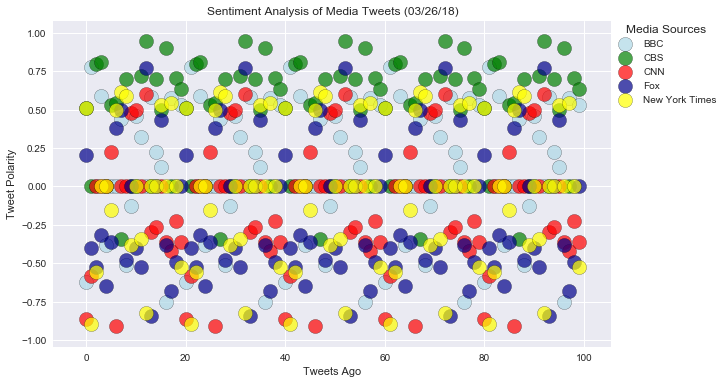

In [49]:
# Create plot
ax = bbc_df.plot.scatter(x="Tweet Ago", y='Compound', s = 200, color='LightBlue',alpha=0.70, edgecolor='Black',label='BBC',figsize=(10, 6))
cbs_df.plot.scatter(x="Tweet Ago", y='Compound',s = 200,color='Green', alpha=0.70,edgecolor='Black',label='CBS',ax=ax)
cnn_df.plot.scatter(x="Tweet Ago", y='Compound',s = 200,color='Red',alpha=0.70, edgecolor='Black',label='CNN', ax=ax)
fox_df.plot.scatter(x="Tweet Ago", y='Compound',s = 200,color='DarkBlue',alpha=0.70, edgecolor='Black',label='Fox', ax=ax)
nytimes_df.plot.scatter(x="Tweet Ago", y='Compound',s = 200,color='Yellow',alpha=0.70, edgecolor='Black',label='New York Times', ax=ax)

sns.set()

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.,title='Media Sources')
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%x")))
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

plt.savefig('SentimentAnalysisofMediaTweets.png',bbox_inches='tight')
plt.show()

In [38]:
sentiment_summary= sentiment_df.groupby(['Target'], as_index=False).agg({'Compound': 'mean'})
sentiment_summary

,Target,Compound
0,@BBC,0.111025
1,@CBS,0.432190
2,@CNN,-0.124475
3,@FoxNews,-0.189065
4,@nytimes,-0.020270


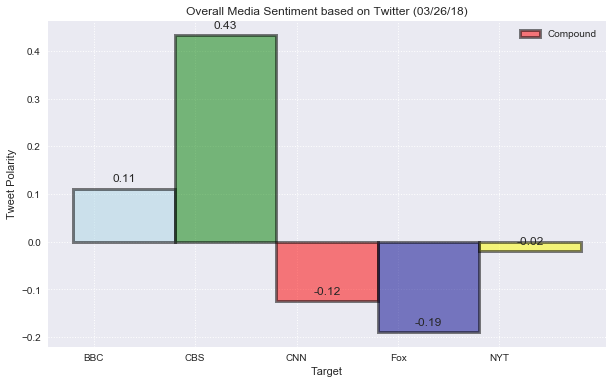

In [39]:
names = ['BBC','CBS','CNN','Fox','NYT']
ax =sentiment_summary.plot(x='Target', y='Compound', kind='bar',alpha=0.5, linewidth =3, align="edge", width = 1.0,facecolor = 'red',edgecolor = 'black',figsize=(10,6))

x_axis = np.arange(len(names))
tick_locations = [value+0.2 for value in x_axis]

plt.xticks(tick_locations, names,rotation=0 )
plt.grid(linestyle='dotted')
plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%x")))
plt.ylabel("Tweet Polarity")


ax.patches[0].set_facecolor('lightblue')
ax.patches[1].set_facecolor('green')
ax.patches[2].set_facecolor('red')
ax.patches[3].set_facecolor('darkblue')
ax.patches[4].set_facecolor('yellow')

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig('OverallSentimentonTwitter.png')
plt.show()

In [40]:
sentiment_df.to_csv("SentimentAnalysisofMediaTweets.csv", sep=',', encoding='utf-8')